In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/hy381/model_training/src')
from data import DataLoader
import json
import os


2025-03-15 14:34:17.931272: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 14:34:19.818067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742049260.363469  616255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742049260.546081  616255 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-15 14:34:22.132021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model_name = 'spo2_dense_model'
model_dir = f'/home/hy381/rds/hpc-work/models/{model_name}'

model_fname = os.path.join(model_dir, f'{model_name}.keras')
predictions_output_file = os.path.join(model_dir, 'predictions.txt')
ground_truth_output_file =  os.path.join(model_dir, 'ground_truth.txt')

if not (os.path.exists(predictions_output_file) and os.path.exists(ground_truth_output_file)): 
    write_predictions_truths(model_name, test_data)

preds = np.loadtxt(predictions_output_file)
gt = np.loadtxt(ground_truth_output_file)

gt_labels = np.argmax(gt, axis = 1)
pred_labels = np.argmax(preds, axis = 1)
cm = confusion_matrix(gt_labels, pred_labels)

In [11]:
mcm = multilabel_confusion_matrix(gt_labels, pred_labels)
print(mcm)
for class_idx, cm in enumerate(mcm): 
    tn, fp, fn, tp = cm.ravel()
    print((tn, fp, fn, tp))

[[[2892  401]
  [ 885 1584]]

 [[3455 1416]
  [ 382  509]]

 [[2901  459]
  [1009 1393]]]
(2892, 401, 885, 1584)
(3455, 1416, 382, 509)
(2901, 459, 1009, 1393)


In [2]:
data_loader = DataLoader()

# SpO2 Models

## Visualize history

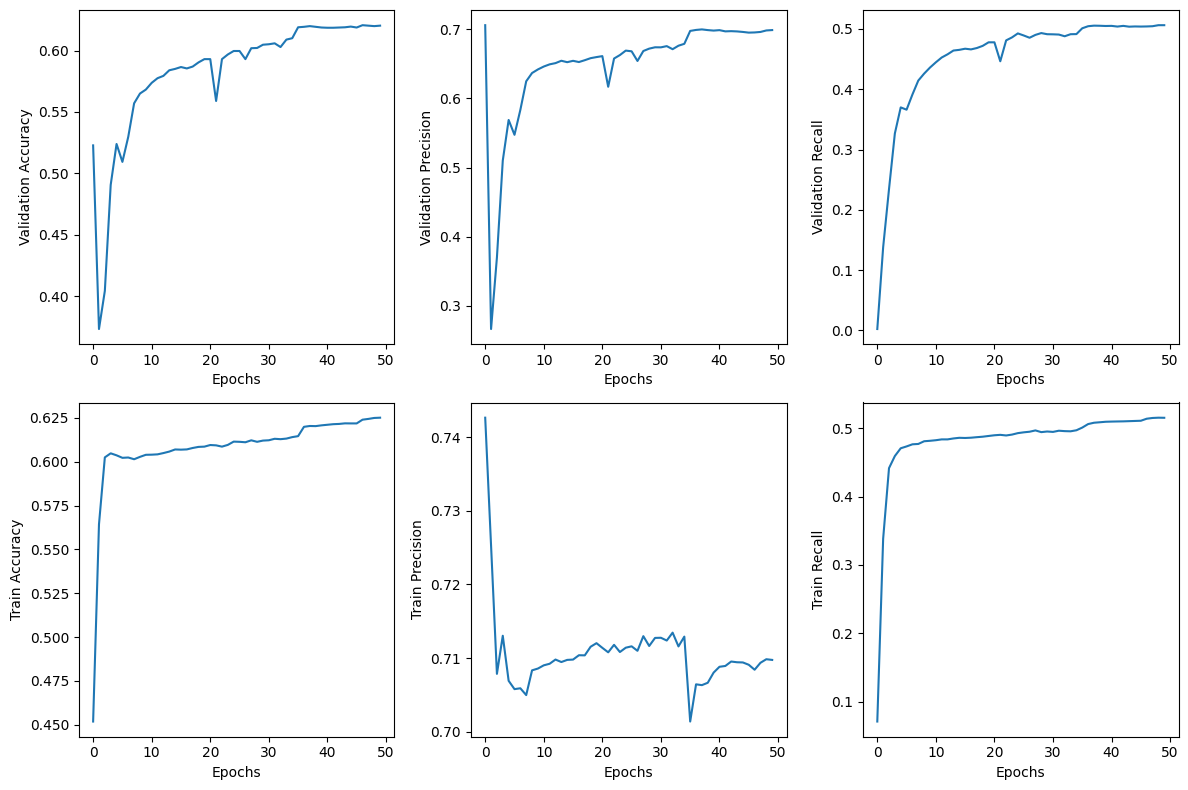

In [11]:
predict.plot_history('spo2_bilstm_model')

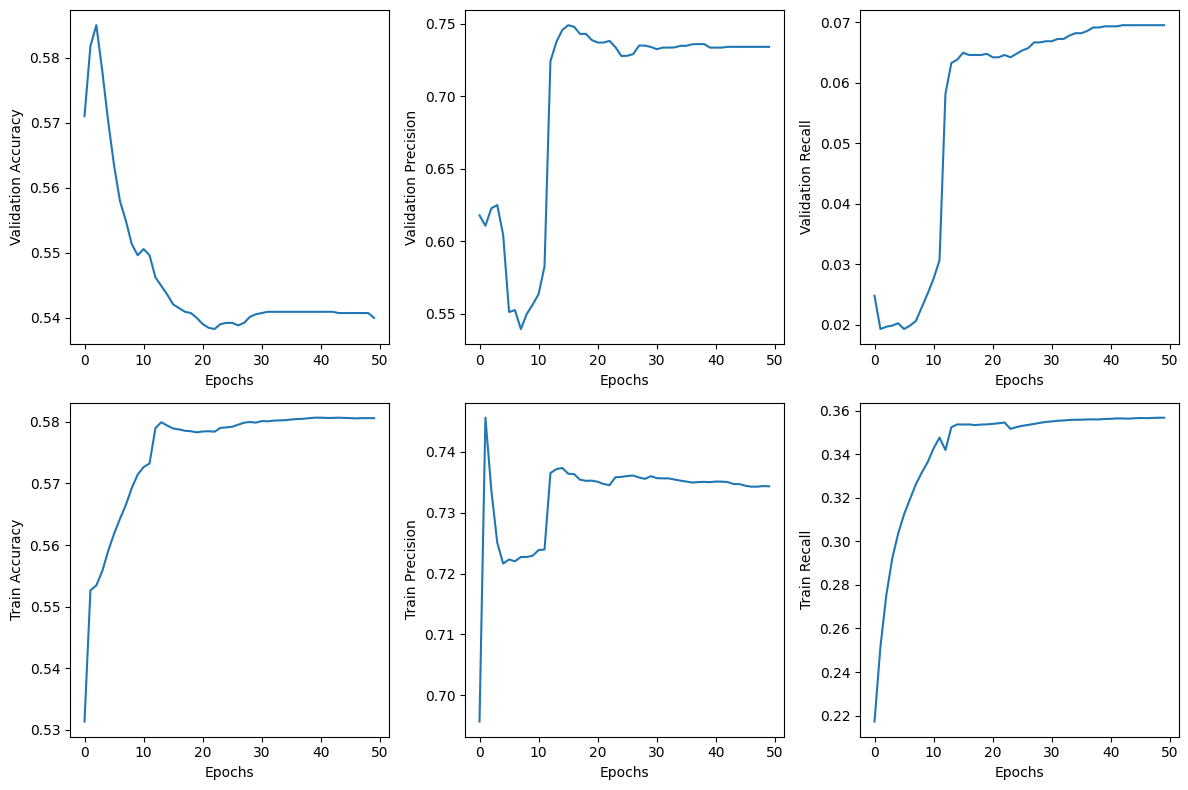

In [12]:
predict.plot_history('spo2_cnn_1d_model')


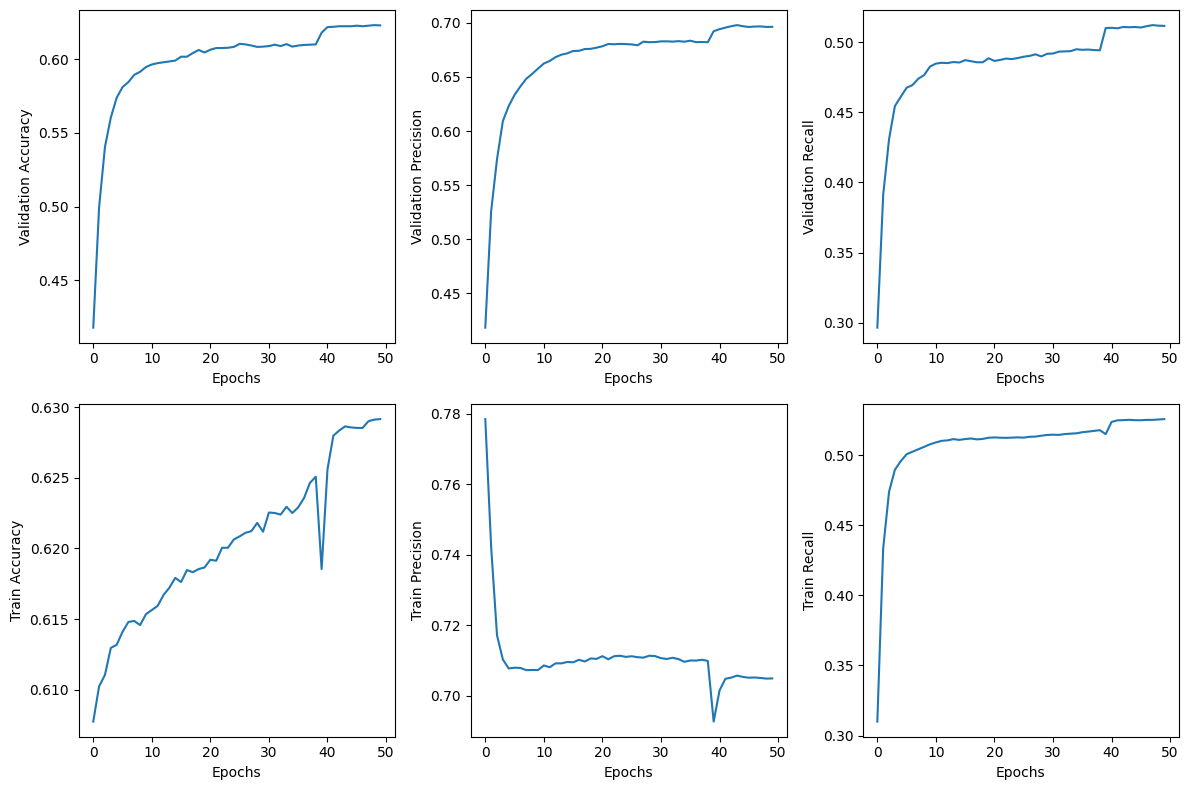

In [14]:
predict.plot_history('spo2_dense_model')

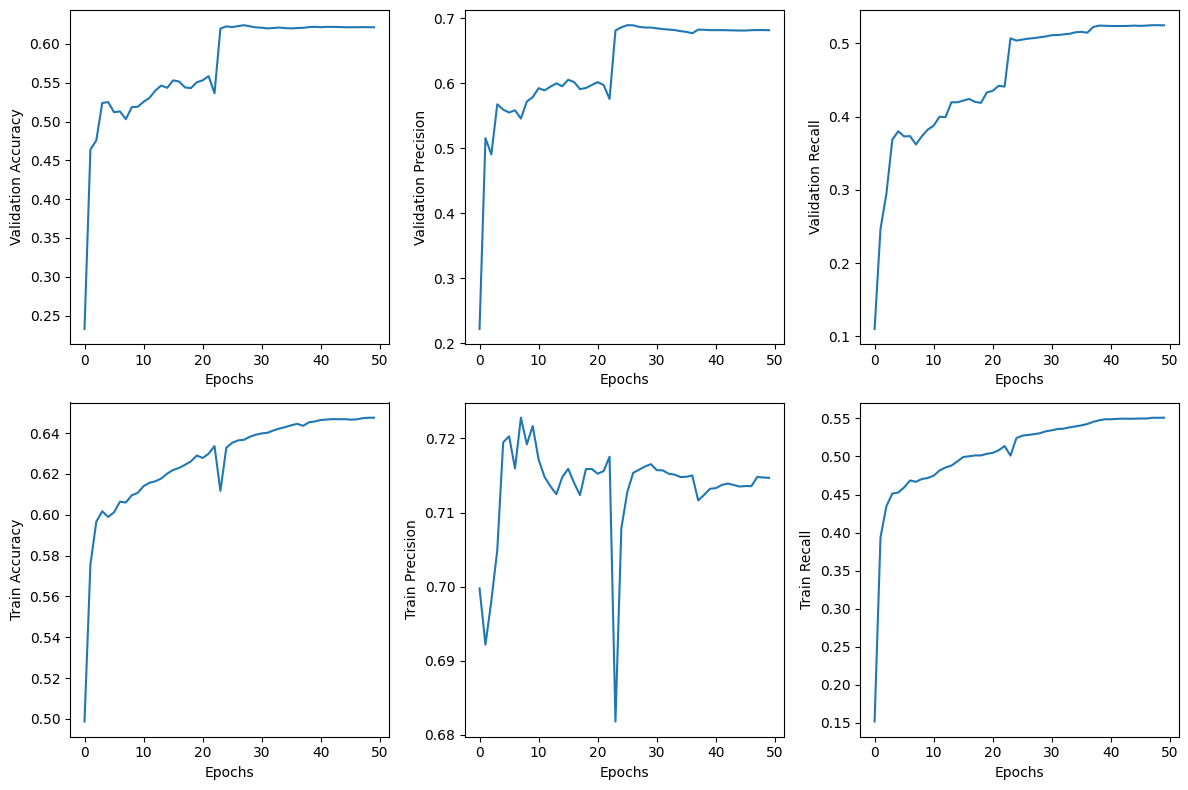

In [15]:
predict.plot_history('spo2_gru_model')

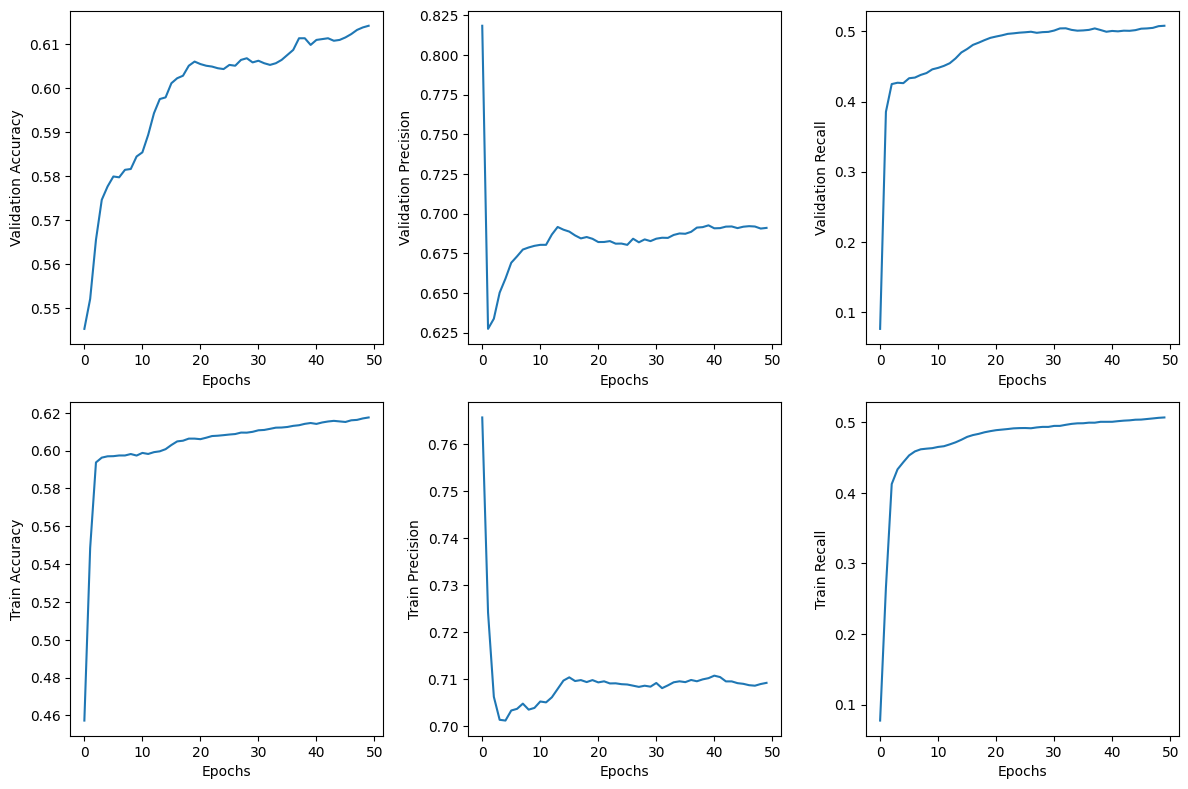

In [16]:
predict.plot_history('spo2_lstm_model')


## Visualize Performance

In [3]:
_, _, test_windowed_spo2_data = data_loader.load_full_data('spo2', window_spo2 = True)
_, _, test_spo2_data = data_loader.load_full_data('spo2')

2025-03-04 12:57:29.377240: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [5]:
predict.confusion_matrix('spo2_bilstm_model', test_windowed_spo2_data)

2025-03-04 12:57:55.038038: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144


     18/Unknown 33s 2s/step

KeyboardInterrupt: 

## Audio Models

In [17]:
ground_truth_file = '/home/hy381/model_training/spo2_model/lstm_model/test/test/ground_truth.txt'
predictions_file = '/home/hy381/model_training/spo2_model/lstm_model/test/test/predictions.txt'

In [18]:
preds = np.loadtxt(predictions_file)
gt = np.loadtxt(ground_truth_file)
gt_labels = np.argmax(gt, axis = 1)
pred_labels = np.argmax(preds, axis = 1)
cm = confusion_matrix(gt_labels, pred_labels)

<Axes: >

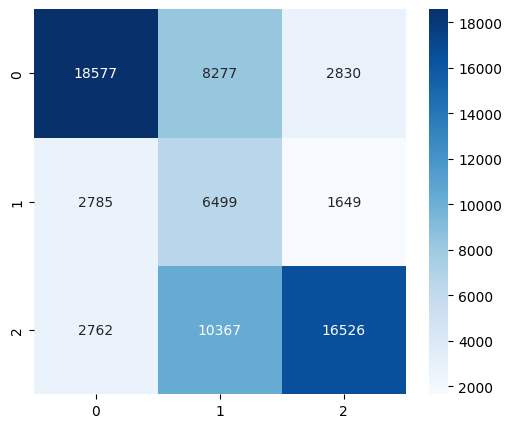

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')